### 참고 강의
1. 부스트캠프 강의
2. [생활코딩 도커 입문 강의](https://seomal.com/map/1/129)
3. [재즐보프 도커 기초 강의](https://www.youtube.com/watch?v=ePpiEy_C_jk&list=PLnIaYcDMsSczk-byS2iCDmQCfVU_KHWDk&index=1)
4. 구글링
---

### 가상화란?
- 개발을 진행한 로컬 환경과 프로덕션 서버 환경이 다르다.
- 로컬과 서버가 같은 OS를 사용해도, 서버에서 올바르게 작동하지 않을 수도 있다.
- 이러한 환경 설정을 매번 사람이 작업을 해야 되기 때문에 에러도 많고 너무 귀찮음.
- 게다가 운영하고 있는 서버가 엄청나게 많다면 더욱 복잡해진다


- 그래서 서버 환경까지도 한번에 소프트웨어화 하자는 고민와 요구가 생긴 것임.
- 위의 문제들을 해결하기 위해 나온 개념이 ```가상화```이다.
- 특정 소프트웨어 환경을 만들고 이를 로컬과 개발 서버에서 그대로 활용한다.

### Docker 등장 이전
- 주로 VM(Virtual Machine)을 사용함
- 호스트 머신이라는 실제 물리적인 컴퓨터 위에, OS를 포함한 가상화 소프트웨어를 두는 방식이다.
- 대표적인 예시가, GCP의 Compute Engine, AWS의 EC2가 있다.
- 즉, OS 위에 OS를 실행하는 것이기 때문에 VM은 많은 리소스를 사용한다.(무겁다)

### Docker 등장 
- 이를 해결하기 위해, Container라는 기술이 등장함.
- 가상화를 좀 더 경량화된 프로세스의 개념으로 만든 기술.
- Container 기술을 쉽게 사용할 수 있도록 나온 도구가 바로, Docker

### Docker Image
- 컨테이너를 실행할 때 사용할 수 있는 템플릿이다.
- 파이썬, Gpu 쿠다 등...을 설치한 세트를 템플릿으로 만들어서 image로 설정함.
- 만들고 나면 수정할 수가 없다. (Read only)

### Docker Container
- image를 활용해 실행된 인스턴스 이다.
- Write가 가능함.


`이미지가 하나가 있고, 컨테이너는 이미지를 기반으로 여러개를 만들 수 있다.`

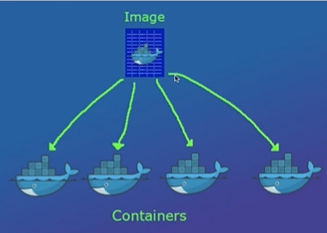

### Docker 장점
- 다른 사람이 만든 소프트웨어를 가져와서 바로 사용이 가능함.
- 여기서 다른 사람이 만든 소프트웨어를 Docker Image라고 한다.
- Image 안에는 OS 설정을 포함한 환경 설정도 포함되기 때문에 어디에서나 동일하게 실행이 가능하다.
- 마찬가지로 내가 만든 Image를 다른 사람에게 공유할 수 있다.
- 내 Image를 원격저장소(Container Registry)에 업로드하면 된다.

#### 대표적인 원격저장소로 Docker Hub가 있다.
- 웬만한 오픈소스들이 공개되어 있고, 필요한 이미지를 다운받자

### 라이프사이클 한번에 이해하기
- 특히, `run`을 자꾸하면 `create`가 계속 실행되니까 이 부분만 조심
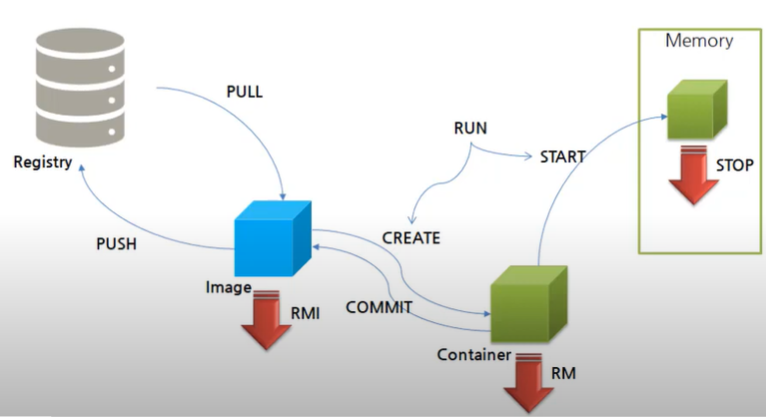

---
### Docker로 MySQL 다운받기

- 도커 이미지가 업로드된 도커 레지스트리에서 가져오면 된다.
- ```docker pull 이미지이름:태그``` 을 사용해서 가져온다.
- ```docker pull mysql:8``` : mysql 8버전의 이미지를 다운로드


- pull로 다운받은 이미지에 대해서 `inspect`명령어를 실행하면 해당 이미지의 다양한 정보를 알 수 있다 (예를 들어 몇번 포트를 사용하는지 등,..)

### 다운받은 이미지 확인
- ```docker images```
- 어떤 이미지와 태그, 아이디, 생성날짜, 사이즈 정보들이 나온다.

### Docker로 MySQL 실행하기
- 실행 명령어 ```docker run 이미지이름:태그```
- 다운 받은 이미지 기반으로 컨테이너를 만들고 실행한다.
- ```--name``` : 컨테이너 이름 지정
- ```-e``` : 환경변수 설정, 이 부분은 사용하는 이미지에 따라 설정이 다르다. mysql같은 경우는 비밀번호를 설정한다.
- ```-d``` : 데몬(백그라운드)모드를 설정한다. 이 설정이 없으면 컨테이너를 나가면 삭제가 된다.
- ```-p``` : 포트를 지정함. 로컬 포트 3306로 접근 시 컨테이너 포트 3306으로 연결되도록 설정한다. Mysql은 기본적으로 3306 포트를 통해 통신된다.

#### 실행된 컨테이너 확인
- ```docker ps```

#### 작동이 멈춘 컨테이너 확인
- ```docker ps -a```

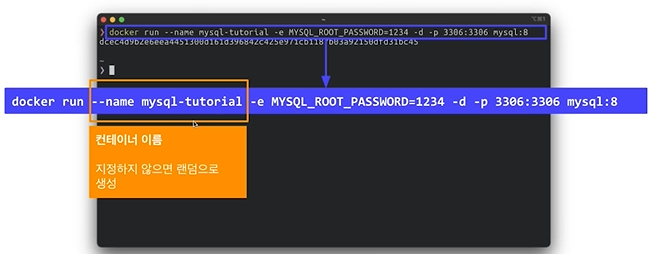

## 컨테이너에 진입 (exectue)
- 디버깅을 위해 컨테이너 안에 들어갈 일이 있음
- ```docker exec -it[옵션] 컨테이너이름(혹은ID) /bin/bash[옵션]``` 명령어
- `-it` 옵션을 통해서 연결을 지속적으로 할 수 있게 한다.(터미널과 컨테이너를 지속적으로 연결시켜주게 함)
- `/bin/bash` 로 bash shell를 실행하게 함


- 컨테이너 밖으로 다시 나가고 싶으면 `exit`

### ```mysql -u root -p```
- 해당 명령어로 mysql 프로세스로 들어옴
- `-u`로 어떤 유저인지 설정 (여기서는 root)
- `-p`로 비밀번호 입력
- 비밀번호 적고나면 mysql 쉘 화면이 보인다.
- 이제 여기서 SQL 사용 가능함

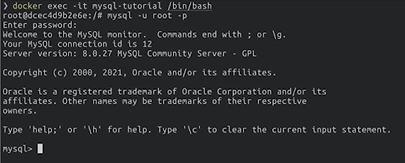

### 컨테이너 삭제
- ```docker rm 컨터이너이름```
- 멈춘 컨테이너를 삭제한다.
- 컨테이너를 멈추기 위해서는 `docker stop 컨테이너`를 한다
- 실행되는 컨테이너는 삭제가 안되고, ```-f```옵션을 넣어서 강제로 삭제는 가능하다.


- 이미지를 삭제할 경우에는, `docker rmi 이미지이름`

#### 팁!!
- `sudo docker stop/rm 'sudo docker ps -a -q'` 를 사용하면 현재 있는 컨테이너 전체에 대해서 stop 또는 rm 가능
- docker ps -a -q가 현재 컨테이너 전체 아이디를 출력하기 때문

### Port Forwarding
- 호스트의 port와 컨테이너의 port로 전송되야 한다.
- 이렇게 연결된 port로 신호를 전달하는 것을 port forwarding이라 한다.
- `-p` 명령어 : Pulish의 줄임말, 컨테이너의 포트를 호스트로 연결해준다는 옵션

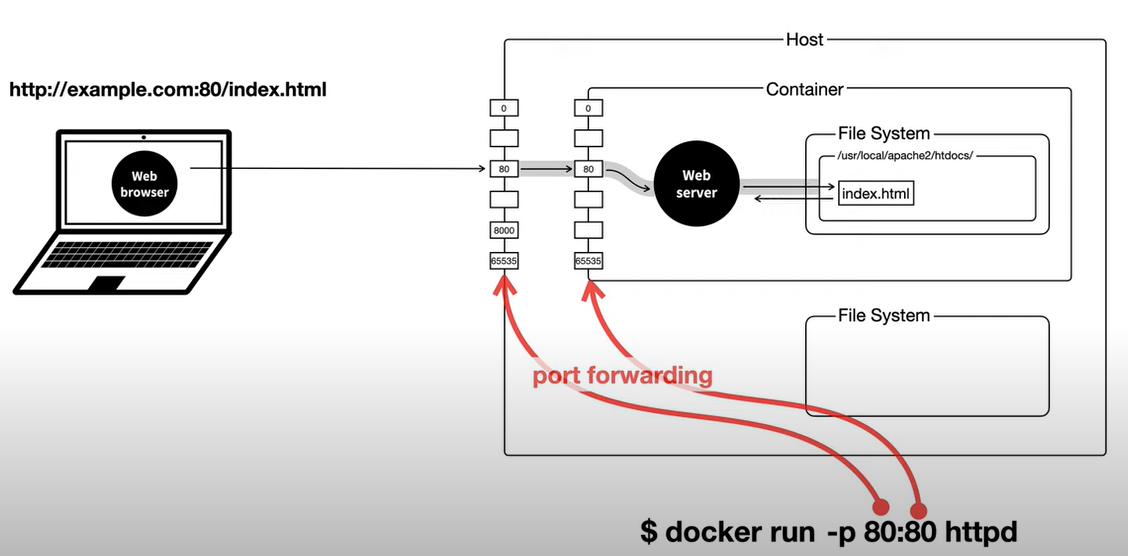

### 로컬(호스트)과 도커간에 파일 옮기기
- `cp` : copy 명령어
- `docker cp <path> <to container>:<path>`
- `docker cp <from container>:<path> <path>`


```bash
# test.txt 만들기
echo test1234 > test.txt
cat test.txt
# test1234 가 출력

# 현재 위치에서 test.txt를 tc라는 컨테이너 위치로 복사
docker cp test.txt tc:/
docker execute -it tc cat /test.txt
# test1234 출력

# tc 컨테이너에 있는 test.txt를 현재(로컬) 디렉토리로 복사
docker cp tc:/test.txt ./test2.txt  
cat test2.txt
# test1234 출력
```

### 볼륨 마운트 옵션
- 로컬과 도커가 파일을 공유할 수 있도록 하자
- `-v` 옵션
- 우리가 우분투를 쓴다고 가정하면, 
- `docker run -v <호스트(우분투) 경로>:<컨테이너 내 경로>:<권한>`
- 권한은 디폴트가 ro(read only)이다. rw(read, write)같은 권한을 줄 수 있다.

---
## Dockerfile로 이미지 만들기
- 만들고 싶은 이미지에 대해서 dockerfile 형식에 맞춰 적고, build 명령으로 새로운 이미지를 만들 수 있다.

### Dockerfile 형식
- 파일 이름은 `Dockerfile`
- `FROM` : 사용할 이미지
- `RUN` : 도커 파일 안에서 운영체제 명령어를 실행시킴
    - 여러 명령어들을 이어쓰기 위해 `&&`를 사용


- `WORKDIR` : 이 곳을 대상으로 명령어들을 실행
- `COPY`
- `CMD`


- **`RUN`은 build가 되는 시점에 실행되는 명령어 -> 이미지에 반영**
- **`CMD` 컨테이너가 실행될 때, 실행되는 명령어 -> 컨테이너에 반영**

### Build
- `-t` 태그 옵션으로 이미지의 이름을 정할 수 있다